In [3]:
#Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

df= pd.read_csv(r"C:\Users\USER\Downloads\Customer - Sheet1.csv")
df


,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Profession,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Healthcare,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,Engineer,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Engineer,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,Lawyer,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Entertainment,Yes,Winter,United States
...,...,...,...,...,...,...,...,...,...,...,...
2000,1996,Female,22,Boots,Footwear,45,Express,Artist,Yes,Summer,United States
2001,1997,Female,22,Boots,Footwear,77,Free Shipping,Doctor,Yes,Summer,Brazil
2002,1998,Male,22,Boots,Footwear,50,Next Day Air,Healthcare,Yes,Summer,United States
2003,1999,Male,22,Boots,Footwear,25,Express,Executive,Yes,Summer,Brazil


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           2005 non-null   int64 
 1   Gender               2005 non-null   object
 2   Age                  2005 non-null   int64 
 3   Items Purchased      2005 non-null   object
 4   Category             2005 non-null   object
 5   Purchase Amount      2005 non-null   int64 
 6   Shipping Type        2005 non-null   object
 7   Profession           1970 non-null   object
 8   Subscription Status  2005 non-null   object
 9   Season               1976 non-null   object
 10  Country              2005 non-null   object
dtypes: int64(3), object(8)
memory usage: 172.4+ KB


In [5]:
#read and columns and check their name to avoid errors
df=pd.DataFrame(df)
df.head()
column_list=list(df.columns)
column_list

['CustomerID',
 'Gender',
 'Age',
 'Items Purchased',
 'Category',
 'Purchase Amount',
 'Shipping Type',
 'Profession',
 'Subscription Status',
 'Season',
 'Country']

In [11]:
df.drop(columns='Profession',inplace=True)
df.head()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Yes,Winter,United States


In [12]:
df['Age Group']=pd.cut(df['Age'],bins=[0,18,20,23,45,55,65,float('inf')],
                       labels=['Under 18','18-24','25-34','35-44','45-54','55-64','65+'],
                       include_lowest=True)

In [13]:
#checking fo any N/a values
df.isna().sum()

CustomerID              0
Gender                  0
Age                     0
Items Purchased         0
Category                0
Purchase Amount         0
Shipping Type           0
Subscription Status     0
Season                 29
Country                 0
Age Group               0
dtype: int64

In [15]:
#dropping the N/a in season column
df = df.dropna(subset=['Season'])


In [17]:
df.isna().sum()

CustomerID             0
Gender                 0
Age                    0
Items Purchased        0
Category               0
Purchase Amount        0
Shipping Type          0
Subscription Status    0
Season                 0
Country                0
Age Group              0
dtype: int64

In [18]:
df.duplicated('CustomerID').sum()

5

In [19]:
df.drop_duplicates(subset='CustomerID',inplace=True)
df.duplicated('CustomerID').sum()

0

In [20]:
df.describe()

,CustomerID,Age,Purchase Amount
count,1971.000000,1971.000000,1971.000000
mean,1013.008625,29.548453,52.505835
std,572.332033,13.123082,29.340870
min,1.000000,18.000000,12.000000
25%,522.500000,22.000000,23.000000
50%,1015.000000,22.000000,50.000000
75%,1507.500000,33.000000,77.000000
max,2000.000000,74.000000,100.000000


Visulaization

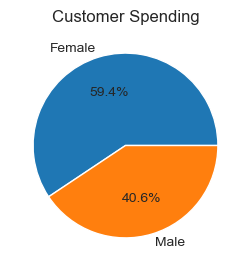

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,3))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Customer Spending')
plt.show()

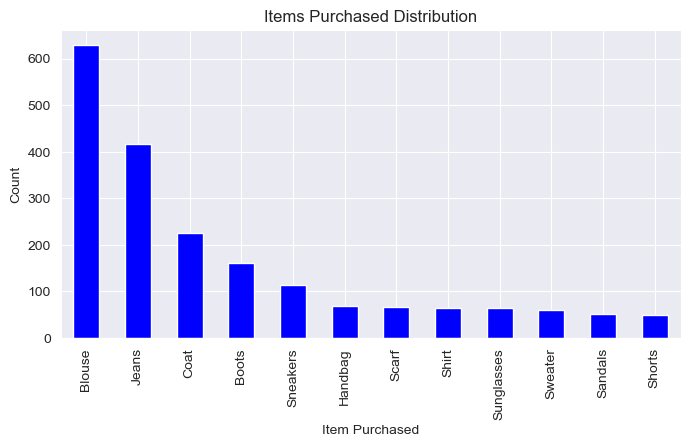

In [28]:
item_counts=df['Items Purchased'].value_counts()
plt.figure(figsize=(8,4))
item_counts.plot(kind='bar',color='blue')

plt.title('Items Purchased Distribution')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.show()


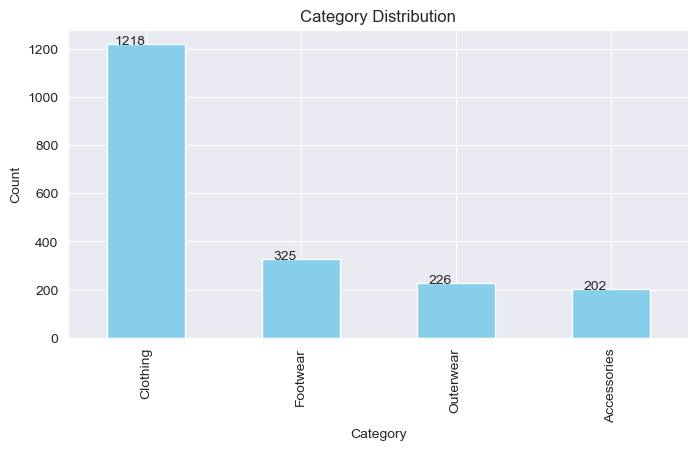

In [35]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 4))

# Specify colors, you can use a single color or a list of colors
bars = category_counts.plot(kind='bar', color='skyblue')

# Adding the count text on top of each bar
for bar, count in zip(bars.patches, category_counts):
    plt.text(bar.get_x() + bar.get_width() / 2-0.1, 
             bar.get_height() + 0.05,  # Adjust text position dynamically
             str(count), 
             fontsize=10, 
             ha='center')  # Horizontal alignment at the center

plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


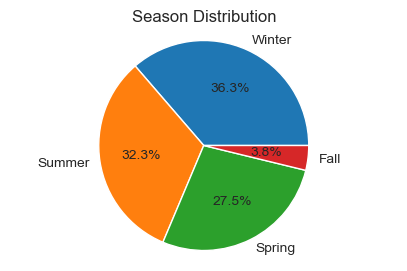

In [37]:
plt.figure(figsize=(5,3))
plt.pie(df['Season'].value_counts(),labels=df['Season'].value_counts().index,autopct='%1.1f%%')
plt.title('Season Distribution')
plt.axis('equal')
plt.show()

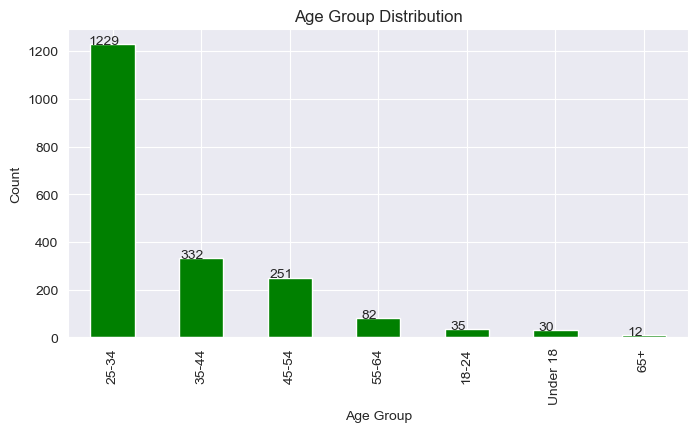

In [38]:
agegroup_counts = df['Age Group'].value_counts()
plt.figure(figsize=(8, 4))

# Specify colors, you can use a single color or a list of colors
bars = agegroup_counts.plot(kind='bar', color='green')

# Adding the count text on top of each bar
for bar, count in zip(bars.patches, agegroup_counts):
    plt.text(bar.get_x() + bar.get_width() / 2-0.1, 
             bar.get_height() + 0.05,  # Adjust text position dynamically
             str(count), 
             fontsize=10, 
             ha='center')  # Horizontal alignment at the center

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

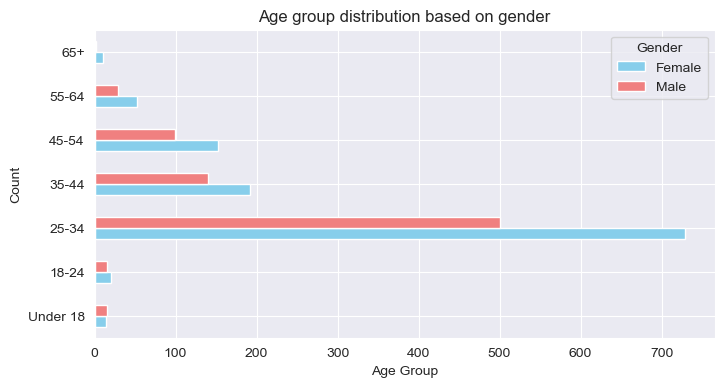

In [46]:
pivot=df.pivot_table(index='Age Group',columns='Gender',aggfunc='size',fill_value=0)
ax = pivot.plot(kind='barh',color=['skyblue','lightcoral'],figsize=(8,4))
ax.set_title('Age group distribution based on gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(title="Gender")
plt.show()